In [2]:
import numpy as np
import matplotlib.pyplot as pp
import seaborn
%matplotlib inline

In [3]:
# weather data taken from http://www.ncdc.noaa.gov

In [4]:
#we are accessing Global Historical Climatology Network data from here: 
#https://www.ncdc.noaa.gov/data-access/land-based-station-data/land-based-datasets/global-historical-climatology-network-ghcn

In [5]:
#you can download like so
#import urllib.request
#urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt', 'stations.txt')

#we will use the downloaded file

In [6]:
#read the downloaded file.. we will read the first few lines via slicing
filepath = 'stations.txt'
lines = []
with open(filepath) as fp:
    lines = list(fp.readlines()[:10])

lines = [line.strip() for line in lines]
lines

['ACW00011604  17.1167  -61.7833   10.1    ST JOHNS COOLIDGE FLD',
 'ACW00011647  17.1333  -61.7833   19.2    ST JOHNS',
 'AE000041196  25.3330   55.5170   34.0    SHARJAH INTER. AIRP            GSN     41196',
 'AEM00041194  25.2550   55.3640   10.4    DUBAI INTL                             41194',
 'AEM00041217  24.4330   54.6510   26.8    ABU DHABI INTL                         41217',
 'AEM00041218  24.2620   55.6090  264.9    AL AIN INTL                            41218',
 'AF000040930  35.3170   69.0170 3366.0    NORTH-SALANG                   GSN     40930',
 'AFM00040938  34.2100   62.2280  977.2    HERAT                                  40938',
 'AFM00040948  34.5660   69.2120 1791.3    KABUL INTL                             40948',
 'AFM00040990  31.5000   65.8500 1010.0    KANDAHAR AIRPORT                       40990']

In [7]:
# the first ACW00011604 is the id, 17.1167  -61.7833 is the lat,long, 10.1 is the height above sea-level , 
#'ST JOHNS COOLIDGE FLD' is the name of the meteorological station
#some are marked with GSN. GCOS Surface Network (GSN) is a global network of over 1000 stations 
# selected from the network of many thousands of existing meteorological stations

In [8]:
# we go through the whole file line by line, get only those marked GSN.. we will collect only the staions names in a dict, 
# indexed by the station code
filepath = 'stations.txt'
stations = {}
with open(filepath) as fp:
    for index, line in enumerate(fp):
        if 'GSN' in line:
            fields = line.split()
            stations[fields[0]] = ' '.join(fields[4:])
            

len(stations)

994

In [9]:
#since there are 994 stations, let's look for interesting patterns within station names and 
# display only those stations matching that pattern
# we will call this function findstation
# inside it, lets build a dict using a comprehension, using the station code and names where the pattern we are interested in 
# is found within the name
def findstation(s):
    found = {code:name for code,name in stations.items() if s in name}
    print(found)

In [10]:
findstation('LIHUE')

{'USW00022536': 'HI LIHUE WSO AP 1020.1 GSN 91165'}


In [11]:
findstation('SAN DIEGO')

{'USW00023188': 'CA SAN DIEGO LINDBERGH FLD GSN 72290'}


In [12]:
findstation('MINNEAPOLIS')

{'USW00014922': 'MN MINNEAPOLIS/ST PAUL AP GSN HCN 72658'}


In [13]:
findstation('IRKUTSK')

{'RSM00030710': 'IRKUTSK GSN 30710'}


In [14]:
# we will focus on these 4 stations from now on
datastations = ['USW00022536', 'USW00023188','USW00014922', 'RSM00030710']

In [15]:
# lets take a look at the data from USW00022536
# its present in gsn/USW00022536.dly
filepath = 'gsn/USW00022536.dly'
lines = []
with open(filepath) as fp:
    lines = list(fp.readlines()[:10])

lines = [line.strip() for line in lines]
lines

['USW00022536195002TMAX  256  0  256  0  256  0  267  0  217  0  228  0  256  0  272  0  256  0  256  0  256  0  244  0  256  0  256  0  244  0  244  0  250  0  256  0  239  0  250  0  256  0  256  0  267  0  261  0  267  0  267  0  261  0  261  0-9999   -9999   -9999',
 'USW00022536195002TMIN  178  0  156  0  161  0  167  0  167  0  167  0  189  0  211  0  206  0  217  0  217  0  211  0  200  0  200  0  206  0  183  0  206  0  206  0  206  0  194  0  206  0  200  0  206  0  200  0  211  0  183  0  172  0  200  0-9999   -9999   -9999',
 'USW00022536195002PRCP    0  0    0  0    0  0    0  0  737  0  406  0   36  0   38  0    0T 0    0T 0    0  0    0T 0   18  0    5  0   10  0   18  0   15  0    5  0    0T 0    0T 0   23  0   10  0    3  0   48  0    0T 0    0T 0    0T 0    5  0-9999   -9999   -9999',
 'USW00022536195002SNOW    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    

In [16]:
# we can parse the data in USW00022536.dly in the correct format, based on format described in readme.txt
# NumPy has a special function, genfromtxt, that can read such a file.
# NumPy needs to be told the file name, the size of all the fields, which columns we wish to keep, 
# the type of all the fields, and last the names that we want to give to all the fields.
# The result will be a NumPy record array.
def parseFile(filename):
    return np.genfromtxt(
        filename,
        delimiter = dly_delimiter,
        usecols = dly_usecols,
        dtype = dly_dtype,
        names = dly_names
    )

In [17]:
# format for the dly file is in readme.txt, III. FORMAT OF DATA FILES (".dly" FILES)
# based on info in the table shown in III. FORMAT OF DATA FILES
dly_delimiter = [11,4,2,4]+[5,1,1,1]*31 #we know that the fields are these many characters (ex. ID is 1-11 or 11 chars)
dly_usecols = [1,2,3]+[4*i for i in range(1,32)] #we will be only using YEAR, MONTH and ELEMENT columns
dly_dtype = [np.int32,np.int32,(np.str_,4)] + [np.int32]*31 #here we specify the types of the fields
dly_names = ['year','month','obs'] + [str(day) for day in range(1,31+1)] # here we specify the field names.. obs means observable

In [18]:
lihue = parseFile('gsn/USW00022536.dly')

In [19]:
lihue

array([(1950, 2, 'TMAX',   256,   256,   256,   267,   217,   228,   256,   272,   256,   256,   256, 244,   256,   256,   244,   244,   250,   256,   239,   250,   256,   256,   267,   261,   267,   267,   261,   261, -9999, -9999, -9999),
       (1950, 2, 'TMIN',   178,   156,   161,   167,   167,   167,   189,   211,   206,   217,   217, 211,   200,   200,   206,   183,   206,   206,   206,   194,   206,   200,   206,   200,   211,   183,   172,   200, -9999, -9999, -9999),
       (1950, 2, 'PRCP',     0,     0,     0,     0,   737,   406,    36,    38,     0,     0,     0,   0,    18,     5,    10,    18,    15,     5,     0,     0,    23,    10,     3,    48,     0,     0,     0,     5, -9999, -9999, -9999),
       ...,
       (2018, 9, 'WSF5',   125,   116,   103,   107,   112,   130,   116,    76,    81,    89,   116, 197,   152,   130,   161,   121,   121,   103,    63,    76, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999),
       (2018, 9, 'WT01',

In [20]:
# we have a rather complicated numpy record array with all the information contained in the original file
# we now need to massage this data into a better form
# currently, the temperatures for all the days of the month sit on the same row which 
# is inconvenient since different months have different days
# Instead each day should have a separate row
# also I would like to associate each date-point with the proper numpy datetime object
# thus we write a function unroll that applies these transformations
# we begin by creating a range of dates that corresponds to a row
# we specify the beginning of the month by specifying only the year and the month in a string fed to the numpy.datetime64 object
def unroll(record):
    startdate = np.datetime64('{}-{:02}'.format(record['year'],record['month'])) 
    # We then create a range of dates using NumPy arange starting at the start date, ending at the start date plus one month.
    # And, with a step of one day.
    dates = np.arange(startdate, startdate + np.timedelta64(1,"M"), np.timedelta64(1,"D"))
    
    # Next, we are going to collect the data for the days from the record.
    # We need to specify the field for which we're going to extract the data.
    # We can do that by enclosing dates in enumerate by looping over an index and a date at the same time.
    # And, by using that index to build a name of the record called.
    # we are also going to divide the datapoints by 10 since temperatures are specified in tenths of degrees. 
    # note, each row is a tuple
    rows = [(date,record[str(i+1)]/10) for i,date in enumerate(dates)]
    return rows
    

In [21]:
unroll(lihue[0])
#so we see that numpy.arange correctly returned the days of February.

[(numpy.datetime64('1950-02-01'), 25.6),
 (numpy.datetime64('1950-02-02'), 25.6),
 (numpy.datetime64('1950-02-03'), 25.6),
 (numpy.datetime64('1950-02-04'), 26.7),
 (numpy.datetime64('1950-02-05'), 21.7),
 (numpy.datetime64('1950-02-06'), 22.8),
 (numpy.datetime64('1950-02-07'), 25.6),
 (numpy.datetime64('1950-02-08'), 27.2),
 (numpy.datetime64('1950-02-09'), 25.6),
 (numpy.datetime64('1950-02-10'), 25.6),
 (numpy.datetime64('1950-02-11'), 25.6),
 (numpy.datetime64('1950-02-12'), 24.4),
 (numpy.datetime64('1950-02-13'), 25.6),
 (numpy.datetime64('1950-02-14'), 25.6),
 (numpy.datetime64('1950-02-15'), 24.4),
 (numpy.datetime64('1950-02-16'), 24.4),
 (numpy.datetime64('1950-02-17'), 25.0),
 (numpy.datetime64('1950-02-18'), 25.6),
 (numpy.datetime64('1950-02-19'), 23.9),
 (numpy.datetime64('1950-02-20'), 25.0),
 (numpy.datetime64('1950-02-21'), 25.6),
 (numpy.datetime64('1950-02-22'), 25.6),
 (numpy.datetime64('1950-02-23'), 26.7),
 (numpy.datetime64('1950-02-24'), 26.1),
 (numpy.datetime

In [22]:
# Instead of a list of tuples however, we want to return a proper NumPy record array. 
# We can modify the function to do that.
# we will feed the list .. rows to the numpy array and specify the proper dtype
# dtype is going to be date in days, followed by the value in double precision number.
def unroll(record):
    startdate = np.datetime64('{}-{:02}'.format(record['year'],record['month']))
    dates = np.arange(startdate, startdate + np.timedelta64(1,"M"), np.timedelta64(1,"D"))
    rows = [(date,record[str(i+1)]/10) for i,date in enumerate(dates)]
    return np.array(rows, dtype=[('date','M8[D]'),('value','d')])

my_rows = unroll(lihue[0])
my_rows[0]['date']

numpy.datetime64('1950-02-01')

In [23]:
def getobs(filename, obs):
    return np.concatenate([unroll(row) for row in parseFile(filename) if row[2] == obs])

In [24]:
lihue_tmin = getobs('gsn/USW00022536.dly','TMIN')
lihue_tmax = getobs('gsn/USW00022536.dly','TMAX')

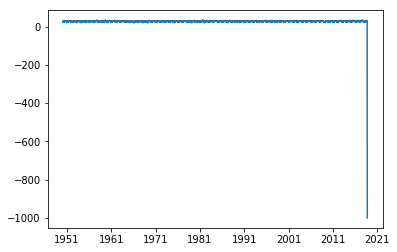

In [25]:
pp.plot(lihue_tmax['date'],lihue_tmax['value'])
# the graph looks weird due to the missing numbers marked -999.9

In [26]:
# we will select all the data points that are -999.9 and mark them NaN
def getobs(filename, obs):
    data = np.concatenate([unroll(row) for row in parseFile(filename) if row[2] == obs])
    data['value'][data['value']==-999.9] = np.nan
    return data

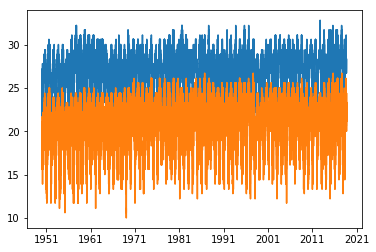

In [27]:
lihue_tmax = getobs('gsn/USW00022536.dly','TMAX')
lihue_tmin = getobs('gsn/USW00022536.dly','TMIN')
pp.plot(lihue_tmax['date'],lihue_tmax['value'])
pp.plot(lihue_tmin['date'],lihue_tmin['value'])
#the graph looks good. The min are consistently lower than the max

In [28]:
#now lets try to get a mean of min and max temperatures
np.mean(lihue_tmax['value']),np.mean(lihue_tmin['value'])

(nan, nan)

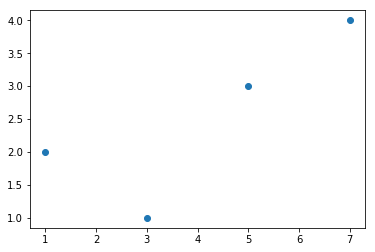

In [29]:
# we get a nan. Because nan are present in the temperatures, we get nan in mean. 
# so we need to find a way to fill in those missing temperatures
# we will try to interpolate those numbers
x = np.array([1,3,5,7])
y = np.array([2,1,3,4])
pp.plot(x,y,'o')

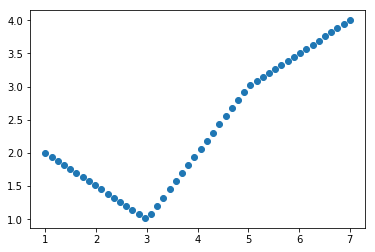

In [30]:
#lets try to interpolate the missing values and show a denser plot
xs = np.linspace(1,7)
ys = np.interp(xs,x,y)
pp.plot(xs,ys,'o')

In [31]:
#fillnans will interpolate the nan values (replace nan with interpolated values)
def fillnans(data):
    datefloat = data['date'].astype(np.float64)
    nan_mask = np.isnan(data['value']) #np.isnan returns a boolean mask 
    data['value'][nan_mask] = np.interp(datefloat[nan_mask],datefloat[~nan_mask],data['value'][~nan_mask])

In [32]:
fillnans(lihue_tmax)
fillnans(lihue_tmin)
np.mean(lihue_tmax['value']),np.mean(lihue_tmin['value'])

(27.322261653175964, 21.07596794130548)

In [33]:
# although we have managed to do some interpolation of missing data, our our temperature series
# are still very noisy. To see trends on longer time scales we need to average out short-term 
# fluctuations. This is known, technically, as smoothing. So we will learn how to smooth data
# using a simple running mean nampy. And we will also see how to place several slots side by 
# side using matplotlib.

* Smoothing data with a running mean
* Showing subplots together with matplotlib

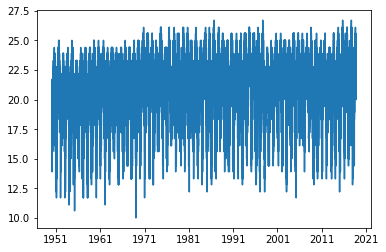

In [35]:
#lets replot a noisy data. It's basically a big block of pixels.
# To get a better result, we will smooth out short-term oscillations.
pp.plot(lihue_tmin['date'], lihue_tmin['value'])

In [36]:
# There are many ways to do it but generally, it involves averaging other nearby values.
# For simplicity, we will just take a running mean, that is a mean over a limited window
# centered at the data point. We can dial up or down the size of the window
# to get more or less smoothing.

* We'll define a plot_smoothed function that will smooth the data and plot it

In [37]:
# win is the size of the window
# The nampy function correlate multiplies the sliding section of a one-dimensional array
# with another shorter array, computes the sum of the multiplied values
# and stores that in a new array. This is just what we need for the running mean
# if we set the shorter array to one divided by its size.
# The 'same' option, makes sure that the size of the resulting array
# is the same as the original one.
def plot_smoothed(t,win=10):
    smoothed = np.correlate(t['value'],np.ones(win)/win,'same')
    pp.plot(t['date'],smoothed)

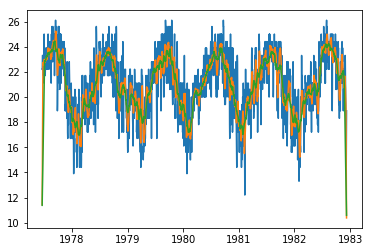

In [38]:
# To see exactly what's happening, let's look at a smaller slice of this array.
# Let's try a couple of different smoothing parameters.
# Let's also compare with the plot without smoothing.
pp.plot(lihue_tmin[10000:12000]['date'], lihue_tmin[10000:12000]['value'])
plot_smoothed(lihue_tmin[10000:12000])#win=10
plot_smoothed(lihue_tmin[10000:12000],30)#win=30

In [ ]:
#Here we can see, indeed, smoothing in action.
# At the edges we see artifacts due to the fact that the smoothing window
# runs out of values to average on the left or the right.